# Experiment 1: HANK with different borrowing constraints
How much agents can smooth their consumption after a shock occurs depends on how much they are allowed to borrow.

In this notebook, we differentiate between a HANK model with
- One household type which cannot borrow
- One household type which can borrow
- Two household types where one can borrow and one cannot

### Assume same discount factor

In [15]:
from ConsIndShockModel_HANK_Borrowing import IndShockConsumerType 
import sequence_jacobian as sj  # SSJ will allow us to define blocks, models, compute IRFs, etc
from sequence_jacobian.classes import JacobianDict, SteadyStateDict
from sequence_jacobian import het, simple, create_model              # functions
import matplotlib.pyplot as plt
import numpy as np
import time
from copy import deepcopy
from scipy import optimize

### Test: Add Borrowing Constraint?!

In [16]:
r_ss = 1.03 - 1
Z_ss = 0.7925

In [17]:
HANK_Borrowing_Dict = {
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + r_ss,                    # Interest factor on assets
    "LivPrb" : [.99375],                   # Survival probability
    "DiscFac": 0.9,

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [.06],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    
    # HANK params
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Z_ss],
    "wage": [1.0],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.0001,                      # Probability of unemployment while working
    "IncUnemp" :  0.0,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": -10.0,                   # Allowing for borrowing (Will use natural borrowing constraint)
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Borrowing_Dict['TranShkMean_Func'] = [function]

In [18]:
Agent_GE_Borrowing = IndShockConsumerType(**HANK_Borrowing_Dict)

In [19]:
Agent_GE_Borrowing.solve()

In [24]:
# vars(Agent_GE_Borrowing)

In [20]:
Agent_GE_Borrowing.aXtraGrid

array([1.00000000e-03, 1.22254015e-02, 2.38323477e-02, 3.58383274e-02,
       4.82618419e-02, 6.11224764e-02, 7.44409758e-02, 8.82393279e-02,
       1.02540853e-01, 1.17370301e-01, 1.32753956e-01, 1.48719755e-01,
       1.65297405e-01, 1.82518528e-01, 2.00416799e-01, 2.19028115e-01,
       2.38390766e-01, 2.58545628e-01, 2.79536373e-01, 3.01409701e-01,
       3.24215585e-01, 3.48007554e-01, 3.72842992e-01, 3.98783472e-01,
       4.25895124e-01, 4.54249034e-01, 4.83921696e-01, 5.14995498e-01,
       5.47559269e-01, 5.81708879e-01, 6.17547910e-01, 6.55188391e-01,
       6.94751629e-01, 7.36369117e-01, 7.80183563e-01, 8.26350026e-01,
       8.75037190e-01, 9.26428796e-01, 9.80725237e-01, 1.03814536e+00,
       1.09892847e+00, 1.16333665e+00, 1.23165727e+00, 1.30420596e+00,
       1.38132984e+00, 1.46341131e+00, 1.55087223e+00, 1.64417886e+00,
       1.74384726e+00, 1.85044969e+00, 1.96462181e+00, 2.08707101e+00,
       2.21858592e+00, 2.36004753e+00, 2.51244185e+00, 2.67687476e+00,
      

In [21]:
Agent_GE_Borrowing.solution[0].mNrmMin

0.0

In [22]:
stop

NameError: name 'stop' is not defined

In [ ]:
### Steady State
HANK_Borrowing_Dict['mMin'] = Agent_GE_Borrowing.solution[0].mNrmMin
Agent_GE_Borrowing.mMin = HANK_Borrowing_Dict['mMin']

Agent_GE_Borrowing.define_distribution_grid()

dist_mGrid = Agent_GE_Borrowing.dist_mGrid



In [ ]:
Agent_GE_Borrowing.calc_transition_matrix()

In [ ]:
Agent_GE_Borrowing.compute_steady_state()

GPFRaw                 = 0.953276 
GPFNrm                 = 0.956358 
GPFAggLivPrb           = 0.947318 
Thorn = APF            = 0.962808 
PermGroFacAdj          = 1.006745 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.891492 
WRPF                   = 0.009318 
DiscFacGPFNrmMax       = 0.984014 
DiscFacGPFAggLivPrbMax = 0.996617 


(0.11208313565893686, 0.7901878338839743)

In [ ]:
# Agent_GE_Borrowing.calc_jacobian()

## Step by step

In [ ]:
T = 300
shk_param = 'Rfree'


In [ ]:
params = {
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + r_ss,                    # Interest factor on assets
    "LivPrb" : [.99375],                   # Survival probability
    "DiscFac": 0.9,

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [.06],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    
    # HANK params
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Z_ss],
    "wage": [1.0],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.0001,                      # Probability of unemployment while working
    "IncUnemp" :  0.0,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": -10.0,                   # Allowing for borrowing (Will use natural borrowing constraint)
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

params['TranShkMean_Func'] = [function]

In [ ]:
# params = deepcopy(self.__dict__["parameters"])
params["T_cycle"] = T  # Dimension of Jacobian Matrix

# Specify a dictionary of lists because problem we are solving is technically finite horizon so variables can be time varying (see section on fake news algorithm in https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA17434 )
params["LivPrb"] = params["T_cycle"] * [Agent_GE_Borrowing.LivPrb[0]]
params["PermGroFac"] = params["T_cycle"] * [Agent_GE_Borrowing.PermGroFac[0]]
params["PermShkStd"] = params["T_cycle"] * [Agent_GE_Borrowing.PermShkStd[0]]
params["TranShkStd"] = params["T_cycle"] * [Agent_GE_Borrowing.TranShkStd[0]]
params["Rfree"] = params["T_cycle"] * [Agent_GE_Borrowing.Rfree]
params["UnempPrb"] = params["T_cycle"] * [Agent_GE_Borrowing.UnempPrb]
params["IncUnemp"] = params["T_cycle"] * [Agent_GE_Borrowing.IncUnemp]

params['wage'] = params['T_cycle']*[Agent_GE_Borrowing.wage[0]]
params['taxrate'] = params['T_cycle']*[Agent_GE_Borrowing.taxrate[0]]
params['labor'] = params['T_cycle']*[Agent_GE_Borrowing.labor[0]]
params['TranShkMean_Func'] = params['T_cycle']*[Agent_GE_Borrowing.TranShkMean_Func[0]]

params['mMin'] = Agent_GE_Borrowing.mMin
# Create instance of a finite horizon agent
FinHorizonAgent = IndShockConsumerType(**params)
FinHorizonAgent.cycles = 1  # required

# delete Rfree from time invariant list since it varies overtime
FinHorizonAgent.del_from_time_inv("Rfree")
# Add Rfree to time varying list to be able to introduce time varying interest rates
FinHorizonAgent.add_to_time_vary("Rfree")

# Set Terminal Solution as Steady State Consumption Function
FinHorizonAgent.cFunc_terminal_ = deepcopy(Agent_GE_Borrowing.solution[0].cFunc)

dx = 0.0001  # Size of perturbation
# Period in which the change in the interest rate occurs (second to last period)
i = params["T_cycle"] - 1



In [ ]:
FinHorizonAgent.IncShkDstn = params["T_cycle"] * [Agent_GE_Borrowing.IncShkDstn[0]]

# If parameter is in time invariant list then add it to time vary list
FinHorizonAgent.del_from_time_inv(shk_param)
FinHorizonAgent.add_to_time_vary(shk_param)

# # this condition is because some attributes are specified as lists while other as floats
# if type(getattr(self, shk_param)) == list:
#     peturbed_list = (
#         (i) * [getattr(self, shk_param)[0]]
#         + [getattr(self, shk_param)[0] + dx]
#         + (params["T_cycle"] - i - 1) * [getattr(self, shk_param)[0]]
#     )  # Sequence of interest rates the agent faces
# else:
#     peturbed_list = (
#         (i) * [getattr(self, shk_param)]
#         + [getattr(self, shk_param) + dx]
#         + (params["T_cycle"] - i - 1) * [getattr(self, shk_param)]
#     )  # Sequence of interest rates the agent 
    
# setattr(FinHorizonAgent, shk_param, peturbed_list)

# Update income process if perturbed parameter enters the income shock distribution
FinHorizonAgent.update_income_process()

# Solve
FinHorizonAgent.solve()

#FinHorizonAgent.Rfree = params["T_cycle"] * [self.Rfree]
# Use Harmenberg Neutral Measure
FinHorizonAgent.neutral_measure = True
FinHorizonAgent.update_income_process()

# Calculate Transition Matrices
FinHorizonAgent.define_distribution_grid()
FinHorizonAgent.calc_transition_matrix()


In [ ]:
FinHorizonAgent.solution[0].mNrmMin

0.0

In [ ]:
Agent_GE_Borrowing.mMin

0.0

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
FinHorizonAgent.mMin 


0.0

In [ ]:
FinHorizonAgent.tran_matrix

[array([[6.34937500e-03, 6.34841160e-03, 6.34743213e-03, ...,
         6.25000000e-03, 6.25000000e-03, 6.25000000e-03],
        [0.00000000e+00, 9.63403446e-07, 1.94286791e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.76934654e-01, 4.22363857e-01, 1.95025558e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.23167258e-02, 4.84381487e-01, 4.22038472e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 6.14843286e-02, 5.52208972e-01]]),
 array([[6.34937500e-03, 6.34841160e-03, 6.34743213e-03, ...,
         6.25000000e-03, 6.25000000e-03, 6.25000000e-03],
        [0.00000000e+00, 9.63403446e-07, 1.94286791e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
# Agent_GE_Borrowing.tran_matrix

In [ ]:
# from HARK.utilities import (
#     construct_assets_grid,
#     gen_tran_matrix_1D,
#     gen_tran_matrix_2D,
#     jump_to_grid_1D,
# )

In [ ]:
# dist_mGrid = Agent_GE_Borrowing.dist_mGrid  # Grid of market resources
# dist_pGrid = Agent_GE_Borrowing.dist_pGrid  # Grid of permanent incomes
# # assets next period
# aNext = dist_mGrid - Agent_GE_Borrowing.solution[0].cFunc(dist_mGrid)

# Agent_GE_Borrowing.aPol_Grid = aNext  # Steady State Asset Policy Grid
# # Steady State Consumption Policy Grid
# Agent_GE_Borrowing.cPol_Grid = Agent_GE_Borrowing.solution[0].cFunc(dist_mGrid)

# # Obtain shock values and shock probabilities from income distribution
# # Bank Balances next period (Interest rate * assets)
# bNext = Agent_GE_Borrowing.Rfree * aNext

In [ ]:
# ### To calculate tranistion matrix
# shk_dstn = Agent_GE_Borrowing.IncShkDstn     

# shk_prbs = shk_dstn[0].pmv  # Probability of shocks
# tran_shks = shk_dstn[0].atoms[1]  # Transitory shocks
# perm_shks = shk_dstn[0].atoms[0]  # Permanent shocks
# LivPrb = Agent_GE_Borrowing.LivPrb[0]  # Update probability of staying alive


# NewBornDist = jump_to_grid_1D(
#     np.zeros_like(tran_shks),
#     shk_prbs,
#     dist_mGrid,)


# # Compute Transition Matrix given shocks and grids.
# tran_matrix = gen_tran_matrix_1D(
#     dist_mGrid,
#     bNext,
#     shk_prbs,
#     perm_shks,
#     tran_shks,
#     LivPrb,
#     NewBornDist,
# )

In [ ]:
# NewBornDist

In [ ]:
# np.mean(NewBornDist)

In [ ]:
# np.mean(tran_matrix)

In [ ]:
# Agent_GE_Borrowing.vec_erg_dstn

In [ ]:
# Agent_GE_Borrowing.compute_steady_state()

In [ ]:
# Agent_GE_Borrowing.T_sim = 1000
# Agent_GE_Borrowing.AgentCount = 10000
# Agent_GE_Borrowing.aNrmInitMean = np.log(0.0)        # Mean of log initial assets. The value of np.log(0.0) causes the code to ensure 

# Agent_GE_Borrowing.track_vars = ['mNrm', 'cNrm', 'aNrm', 'pLvl', 'aLvl']

In [ ]:
# Agent_GE_Borrowing.initialize_sim()

In [ ]:
# Agent_GE_Borrowing.simulate()

In [ ]:
# np.mean(Agent_GE_Borrowing.state_now["aLvl"])

### Test: No Borrowing Constraint end

### SImulate monte Carlo

In [ ]:
# stop

In [ ]:
def show_irfs(irfs_list, variables, labels=[" "], ylabel=r"Percentage points (dev. from ss)", T_plot=50, figsize=(18, 6)):
    if len(irfs_list) != len(labels):
        labels = [" "] * len(irfs_list)
    n_var = len(variables)
    fig, ax = plt.subplots(1, n_var, figsize=figsize, sharex=True)
    for i in range(n_var):
        # plot all irfs
        for j, irf in enumerate(irfs_list):
            ax[i].plot(100 * irf[variables[i]][:50], label=labels[j])
        ax[i].set_title(variables[i])
        ax[i].set_xlabel(r"$t$")
        if i==0:
            ax[i].set_ylabel(ylabel)
        ax[i].legend()
    plt.show()

In [ ]:
# Defining steady state values of the economy
def fiscal_ss(B, r, G): 
    T = (1 + r) * B + G - B    
    return T

r_ss = 1.03 - 1
G_ss = .2
B_ss = 0.25 # this is lower than the tutorial by Straub et al. because need Higher MPC
Y_ss = 1.0

T_ss = fiscal_ss(B_ss,r_ss,G_ss)
print('T_ss: ' +str(T_ss))

Z_ss = Y_ss - T_ss
C_ss = Y_ss - G_ss

print('Z_ss: ' +str(Z_ss))
print('C_ss: ' +str(Y_ss - G_ss))

T = 300 # Dimention of TxT Jacobian matrix

T_ss: 0.20750000000000002
Z_ss: 0.7925
C_ss: 0.8


In [ ]:
HANK_Dict = {
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + r_ss,                    # Interest factor on assets
    "LivPrb" : [.99375],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [.06],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    
    # HANK params
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Z_ss],
    "wage": [1.0],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.01,                      # Probability of unemployment while working
    "IncUnemp" :  0.0,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": 0.0,                   # Allowing for borrowing (Will use natural borrowing constraint)
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

In [ ]:
# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict['TranShkMean_Func'] = [function]

In [ ]:
### Target Steady State Asset
def ss_func(beta):
    HANK_Dict['DiscFac'] = beta
    Agent_func = IndShockConsumerType(**HANK_Dict, verbose = False)
    A_ss = Agent_func.compute_steady_state()[0]
    return A_ss
    

def ss_dif(beta):    
    return ss_func(beta) - Asset_target 

Asset_target = B_ss
DiscFac = optimize.brentq(ss_dif,.75,.99)

In [ ]:
np.max([-1.0, 0.0])

0.0

In [ ]:
# Create a new agent
HANK_Dict['DiscFac'] = DiscFac
Agent_GE = IndShockConsumerType(**HANK_Dict, verbose = False)

In [ ]:
A_ss, C_ss = Agent_GE.compute_steady_state()
MPC = Agent_GE.calc_jacobian('labor',T)[0][0][0]
print('Our general equilibrium agent has a discount rate of: ' + "%.2f" % Agent_GE.DiscFac +'. Where the steady state MPC is ' + "%.2f" % MPC + ' and Bond Holdings are ' + "%.2f" % A_ss)

Our general equilibrium agent has a discount rate of: 0.85. Where the steady state MPC is 0.48 and Bond Holdings are 0.25


In [ ]:
start = time.time()

CJACR, AJACR = Agent_GE.calc_jacobian('Rfree',T)
CJACZ, AJACZ = Agent_GE.calc_jacobian('labor', T)

print('Seconds to calculate Jacobian', time.time() - start)

Seconds to calculate Jacobian 8.189242839813232


### Allow for borrowing

In [ ]:
HANK_Borrowing_Dict = {
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + r_ss,                    # Interest factor on assets
    "LivPrb" : [.99375],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [.06],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    
    # HANK params
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Z_ss],
    "wage": [1.0],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.01,                      # Probability of unemployment while working
    "IncUnemp" :  0.0,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": -10.0,                   # Allowing for borrowing (Will use natural borrowing constraint)
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

HANK_Borrowing_Dict['TranShkMean_Func'] = [function]

In [ ]:
# ### Target Steady State Asset
# def ss_func(beta):
#     HANK_Borrowing_Dict['DiscFac'] = beta
#     Agent_func = IndShockConsumerType(**HANK_Borrowing_Dict, verbose = False)
#     Agent_func.solve()
#     HANK_Borrowing_Dict['mMin'] = Agent_func.solution[0].mNrmMin
#     Agent_func = IndShockConsumerType(**HANK_Borrowing_Dict, verbose = False)
#     A_ss = Agent_func.compute_steady_state()[0]
#     return A_ss
    

# def ss_dif(beta):    
#     return ss_func(beta) - Asset_target 

# Asset_target = B_ss
# DiscFac = optimize.brentq(ss_dif,.75,.99)

In [ ]:
# Create a new agent
HANK_Borrowing_Dict['DiscFac'] = HANK_Dict['DiscFac']
Agent_GE_Borrowing = IndShockConsumerType(**HANK_Borrowing_Dict, verbose = False)

In [ ]:
Agent_GE_Borrowing.solve()

In [ ]:
Agent_GE_Borrowing.solution[0].mNrmMin


0.0

In [ ]:
HANK_Borrowing_Dict['mMin'] = Agent_GE_Borrowing.solution[0].mNrmMin
Agent_GE_Borrowing.mMin = HANK_Borrowing_Dict['mMin'] + 0.001

Agent_GE_Borrowing.define_distribution_grid()

dist_mGrid = Agent_GE_Borrowing.dist_mGrid

Agent_GE_Borrowing.compute_steady_state()

(0.25000917053725347, 0.7934566375707276)

In [ ]:
Agent_GE_Borrowing.define_distribution_grid()

In [ ]:
dist_mGrid = Agent_GE_Borrowing.dist_mGrid

In [ ]:
dist_mGrid[0]

0.00299999999999989

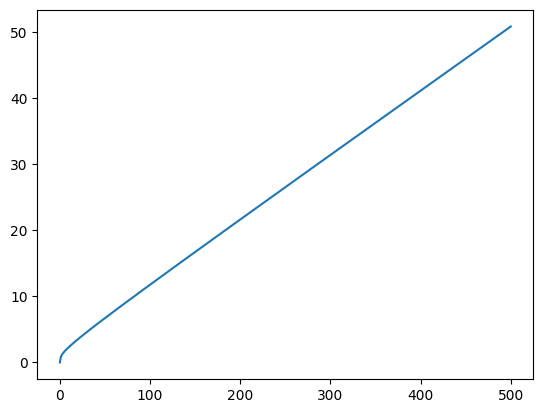

In [ ]:
plt.plot(dist_mGrid, Agent_GE_Borrowing.solution[0].cFunc(dist_mGrid))

In [ ]:
Agent_GE_Borrowing.solution[0].cFunc(dist_mGrid)

array([2.72895442e-03, 7.76647818e-03, 1.28838035e-02, 1.80834496e-02,
       2.33707612e-02, 2.87477201e-02, 3.42163645e-02, 3.97787904e-02,
       4.54371545e-02, 5.11936752e-02, 5.70506357e-02, 6.30103857e-02,
       6.90753439e-02, 7.52480003e-02, 8.15309190e-02, 8.79267406e-02,
       9.44381848e-02, 1.01068054e-01, 1.07819234e-01, 1.14694702e-01,
       1.21694193e-01, 1.28773419e-01, 1.35985405e-01, 1.43333488e-01,
       1.50821109e-01, 1.58451817e-01, 1.66229276e-01, 1.74157266e-01,
       1.82239690e-01, 1.90480575e-01, 1.98884083e-01, 2.07454509e-01,
       2.16196292e-01, 2.25114018e-01, 2.34112961e-01, 2.43261757e-01,
       2.52598421e-01, 2.62128114e-01, 2.71856173e-01, 2.81788120e-01,
       2.91929667e-01, 3.02286728e-01, 3.12865422e-01, 3.23653876e-01,
       3.34451883e-01, 3.45485906e-01, 3.56762833e-01, 3.68289803e-01,
       3.80074215e-01, 3.92123740e-01, 4.04446336e-01, 4.16694528e-01,
       4.29205956e-01, 4.42007297e-01, 4.55107501e-01, 4.68515864e-01,
      

In [ ]:
Agent_GE_Borrowing.compute_steady_state()

(0.24583696877934172, 0.7933583300912085)

In [ ]:
Agent_GE_Borrowing.DiscFac

0.8458861814487759

In [ ]:
Agent_GE.compute_steady_state()
Agent_GE.DiscFac

0.8458861814487759

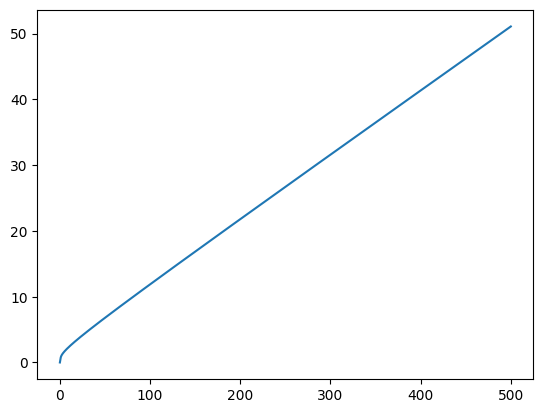

In [ ]:
plt.plot(dist_mGrid, Agent_GE.solution[0].cFunc(dist_mGrid))

In [ ]:
Agent_GE.solution[0].cFunc(dist_mGrid)

array([2.72895466e-03, 7.76647885e-03, 1.28838409e-02, 1.80835543e-02,
       2.33709345e-02, 2.87479631e-02, 3.42166783e-02, 3.97791764e-02,
       4.54376138e-02, 5.11942091e-02, 5.70512455e-02, 6.30110728e-02,
       6.90761096e-02, 7.52488460e-02, 8.15318462e-02, 8.79277506e-02,
       9.44392792e-02, 1.01069234e-01, 1.07820502e-01, 1.14696059e-01,
       1.21695776e-01, 1.28775549e-01, 1.35988093e-01, 1.43336744e-01,
       1.50824943e-01, 1.58456241e-01, 1.66234301e-01, 1.74162904e-01,
       1.82245952e-01, 1.90487474e-01, 1.98891631e-01, 2.07462720e-01,
       2.16205179e-01, 2.25123594e-01, 2.34125387e-01, 2.43276069e-01,
       2.52614657e-01, 2.62146314e-01, 2.71876379e-01, 2.81810373e-01,
       2.91954010e-01, 3.02313206e-01, 3.12894080e-01, 3.23690259e-01,
       3.34492611e-01, 3.45531075e-01, 3.56812540e-01, 3.68344148e-01,
       3.80133303e-01, 3.92187678e-01, 4.04515233e-01, 4.16784958e-01,
       4.29304768e-01, 4.42114684e-01, 4.55223665e-01, 4.68641011e-01,
      

In [ ]:
Agent_GE_Borrowing.calc_transition_matrix()


In [ ]:
np.max(Agent_GE_Borrowing.tran_matrix)

0.5336631387777779

In [ ]:
Agent_GE.tran_matrix

array([[0.0161875 , 0.01531165, 0.0143712 , ..., 0.00625   , 0.00625   ,
        0.00625   ],
       [0.        , 0.00087585, 0.0018163 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.35414952, 0.52704661,
        0.08264318],
       [0.        , 0.        , 0.        , ..., 0.01181996, 0.3643675 ,
        0.52407505],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01230506,
        0.38703177]])

In [ ]:
## 'cheating' using SS values from the model without borrowing
A_ss, C_ss = Agent_GE.compute_steady_state()

In [ ]:
Agent_GE_Borrowing.A_ss = A_ss
Agent_GE_Borrowing.C_ss = C_ss

In [ ]:
Agent_GE_Borrowing.calc_jacobian('labor',T)

(array([[ 1.94199263e+01, -3.47303109e+01, -3.93956048e+01, ...,
         -4.34378388e+01, -4.34378388e+01, -4.34378388e+01],
        [ 1.02564014e+01,  1.69944930e+01, -1.60114554e+01, ...,
         -2.28504097e+01, -2.28504097e+01, -2.28504097e+01],
        [ 5.58893135e+00,  8.81798227e+00,  2.67829115e+01, ...,
         -1.19971456e+01, -1.19971456e+01, -1.19971456e+01],
        ...,
        [ 1.89521213e-01,  1.06581410e-14,  5.50670620e-14, ...,
          3.92778574e+01,  7.04167276e+00,  3.73892104e+00],
        [ 1.89521213e-01,  1.06581410e-14,  5.50670620e-14, ...,
          2.08841035e+01,  3.92778574e+01,  7.04167276e+00],
        [ 1.89521213e-01,  1.06581410e-14,  5.50670620e-14, ...,
          1.12892849e+01,  2.08841035e+01,  3.92778574e+01]]),
 array([[ 2.09540543e+01, -1.72566034e+01, -1.25913095e+01, ...,
         -8.54907550e+00, -8.54907550e+00, -8.54907550e+00],
        [ 1.13787042e+01,  1.82119652e+01,  3.02076048e+00, ...,
          1.40062677e+01,  1.40062677e

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
A_ss, C_ss = Agent_GE_Borrowing.compute_steady_state()
MPC = Agent_GE_Borrowing.calc_jacobian('labor',T)[0][0][0]
print('Our general equilibrium agent has a discount rate of: ' + "%.2f" % Agent_GE_Borrowing.DiscFac +'. Where the steady state MPC is ' + "%.2f" % MPC + ' and Bond Holdings are ' + "%.2f" % A_ss)

Our general equilibrium agent has a discount rate of: 0.85. Where the steady state MPC is 19.23 and Bond Holdings are 0.25


In [ ]:
start = time.time()

CJACR_Borrowing, AJACR_Borrowing = Agent_GE_Borrowing.calc_jacobian('Rfree',T)
CJACZ_Borrowing, AJACZ_Borrowing = Agent_GE_Borrowing.calc_jacobian('labor', T)

print('Seconds to calculate Jacobian', time.time() - start)

Seconds to calculate Jacobian 8.477231979370117


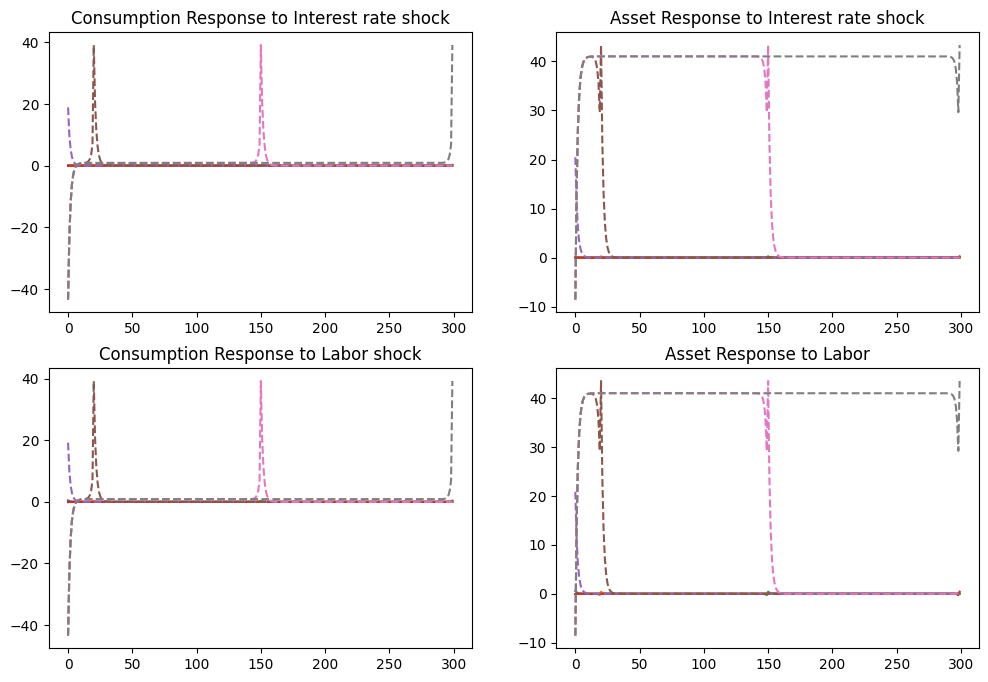

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Consumption Response to Interest rate shock
axs[0, 0].plot(CJACR.T[0])
axs[0, 0].plot(CJACR.T[20])
axs[0, 0].plot(CJACR.T[150])
axs[0, 0].plot(CJACR.T[-1])
axs[0, 0].plot(CJACR_Borrowing.T[0], '--')
axs[0, 0].plot(CJACR_Borrowing.T[20], '--')
axs[0, 0].plot(CJACR_Borrowing.T[150], '--')
axs[0, 0].plot(CJACR_Borrowing.T[-1], '--')
axs[0, 0].set_title("Consumption Response to Interest rate shock")

# Asset Response to Interest rate shock
axs[0, 1].plot(AJACR.T[0])
axs[0, 1].plot(AJACR.T[20])
axs[0, 1].plot(AJACR.T[150])
axs[0, 1].plot(AJACR.T[-1])
axs[0, 1].plot(AJACR_Borrowing.T[0], '--')
axs[0, 1].plot(AJACR_Borrowing.T[20], '--')
axs[0, 1].plot(AJACR_Borrowing.T[150], '--')
axs[0, 1].plot(AJACR_Borrowing.T[-1], '--')
axs[0, 1].set_title("Asset Response to Interest rate shock")

# Consumption Response to Labor shock
axs[1, 0].plot(CJACZ.T[0])
axs[1, 0].plot(CJACZ.T[20])
axs[1, 0].plot(CJACZ.T[150])
axs[1, 0].plot(CJACZ.T[-1])
axs[1, 0].plot(CJACZ_Borrowing.T[0], '--')
axs[1, 0].plot(CJACZ_Borrowing.T[20], '--')
axs[1, 0].plot(CJACZ_Borrowing.T[150], '--')
axs[1, 0].plot(CJACZ_Borrowing.T[-1], '--')
axs[1, 0].set_title("Consumption Response to Labor shock")

# Asset Response to Labor
axs[1, 1].plot(AJACZ.T[0])
axs[1, 1].plot(AJACZ.T[20])
axs[1, 1].plot(AJACZ.T[150])
axs[1, 1].plot(AJACZ.T[-1])
axs[1, 1].plot(AJACZ_Borrowing.T[0], '--')
axs[1, 1].plot(AJACZ_Borrowing.T[20], '--')
axs[1, 1].plot(AJACZ_Borrowing.T[150], '--')
axs[1, 1].plot(AJACZ_Borrowing.T[-1], '--')
axs[1, 1].set_title("Asset Response to Labor")

plt.show()